In [1]:
import seaborn as sns
from data_preparation import *

In [7]:
df = load_preprocessed_dataset(remove_duplicates=True)
genome_df = df[df['wfType'] == 'genome']
bwa_df = df[df['wfType'] == 'bwa']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2078 entries, 1909 to 768
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   storageRegion        2078 non-null   object        
 1   storageProvider      2078 non-null   object        
 2   functionId           2078 non-null   object        
 3   functionName         2078 non-null   object        
 4   functionType         2078 non-null   object        
 5   RTT                  2078 non-null   float64       
 6   loopCounter          2078 non-null   float64       
 7   maxLoopCounter       2078 non-null   float64       
 8   startTime            2078 non-null   datetime64[ns]
 9   endTime              2078 non-null   datetime64[ns]
 10  upAll                2078 non-null   float64       
 11  downAll              2078 non-null   float64       
 12  numberDownloadFiles  2078 non-null   int64         
 13  sizeDownloadInMB     2078 non-null  

In [8]:
def export_corr_for_latex(corr_df: pd.DataFrame, filename: str):
    idx_before = None
    with open(os.path.join(get_data_dir(), filename), "w") as f:
        for row in corr_df.transpose().unstack().items():
            idx1, idx2 = row[0]
            idx1 = idx1.replace("Enc", "")
            idx2 = idx2.replace("Enc", "")
            value = row[1]
            line = idx2 + ' ' + idx1 + ' ' + str(value) + '\n'
            if idx_before is not None and idx_before != idx1:
                line = '\n' + line
            idx_before = idx1
            f.write(line)

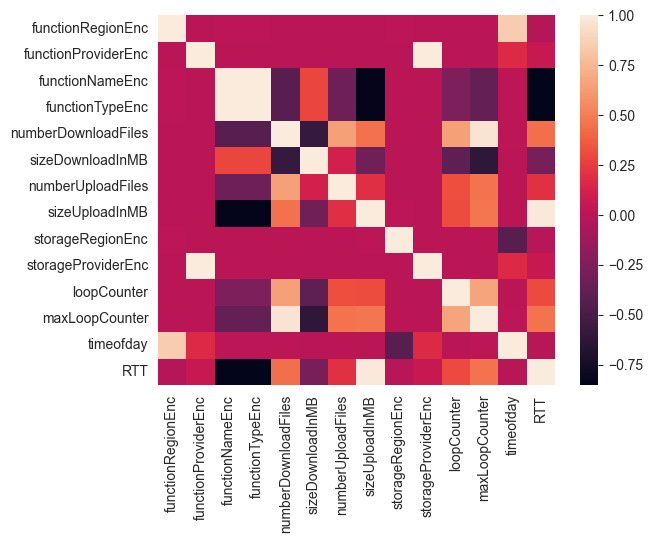

In [9]:
cols = get_function_related_cols() + get_storage_related_cols() + get_concurrency_related_cols() + get_time_related_cols() + [
    'RTT']
cols.remove('wfTypeEnc')
cols.remove('dayofweek')
temp_df = genome_df.loc[:, cols]
corr = temp_df.select_dtypes('number').corr()
sns.heatmap(corr)
export_corr_for_latex(corr, "corr_for_latex_genome.dat")

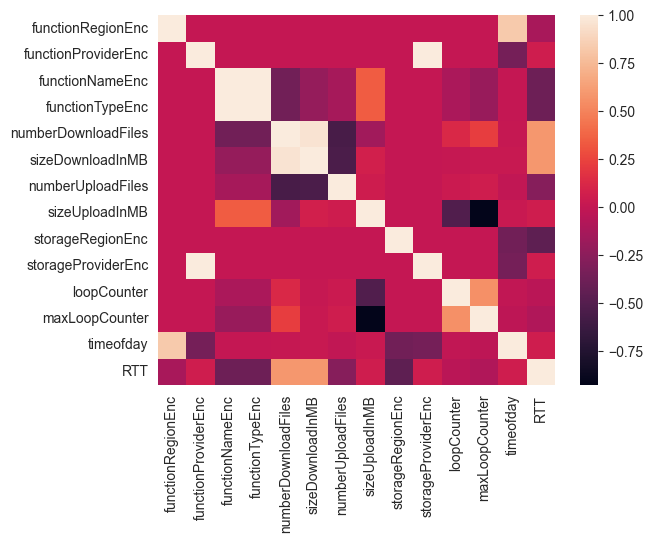

In [10]:
cols = get_function_related_cols() + get_storage_related_cols() + get_concurrency_related_cols() + get_time_related_cols() + [
    'RTT']
cols.remove('wfTypeEnc')
cols.remove('dayofweek')
temp_df = bwa_df.loc[:, cols]
corr = temp_df.select_dtypes('number').corr()
sns.heatmap(corr)
export_corr_for_latex(corr, "corr_for_latex_bwa.dat")

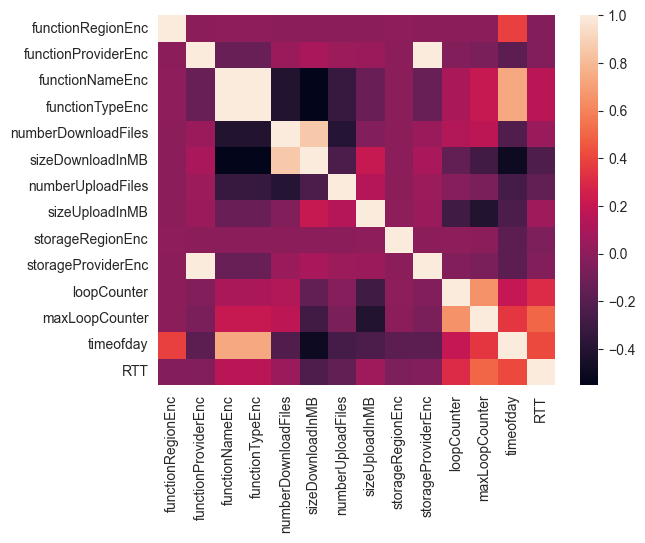

In [11]:
cols = get_function_related_cols() + get_storage_related_cols() + get_concurrency_related_cols() + get_time_related_cols() + [
    'RTT']
cols.remove('wfTypeEnc')
cols.remove('dayofweek')
temp_df = df.loc[:, cols]
corr = temp_df.select_dtypes('number').corr()
sns.heatmap(corr)
export_corr_for_latex(corr, "corr_for_latex.dat")

In [27]:
temp_df = genome_df
temp_df = temp_df[temp_df['functionRegion'] == temp_df['storageRegion']]
temp_df.groupby('functionName')[['sizeUploadInMB','sizeDownloadInMB']].mean()

,sizeUploadInMB,sizeDownloadInMB
functionName,,
genomeFrequency,7.20,0.46
genomeIndividual,0.01,13.90
genomeIndividualsMerge,0.03,0.03
genomeMutualOverlap,0.30,0.46
genomePreparePop,0.00,0.00
genomeSifting,0.36,25.50


In [26]:
temp_df = bwa_df
temp_df = temp_df[temp_df['functionRegion'] == temp_df['storageRegion']]
temp_df.groupby('functionName')[['sizeUploadInMB','sizeDownloadInMB']].mean()

,sizeUploadInMB,sizeDownloadInMB
functionName,,
bwaAlnR1,0.79,60.20
bwaAlnR2,0.76,60.20
bwaIndex,7.70,4.50
bwaMerge,45.60,45.60
bwaSampe,11.40,108.44
bwaSort,35.50,45.60
bwaSplit,4.50,4.50
